#### Data Loading

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is already loaded into a DataFrame named 'df'
df=pd.read_csv('Housing_Affordability.csv')
df.head()

,ID,Population_Density,Age,Income,Home_Price,Rental_Price,GDP_Per_Capita,Unemployment_Rate,Commute_Time,Internet_Speed,Crime_Rate,Community_Satisfaction
0,1,7370,59,59598.93026,50302.52947,3961.439172,50500.38795,5.117960,25.141150,30.190915,5.005252,14.455388
1,2,960,66,89393.81821,478055.12070,1930.412241,75697.67542,1.561291,36.092519,46.210121,3.031026,-1.441514
2,3,5490,45,44186.16587,516445.04470,3501.211684,34094.64615,12.149888,28.860140,6.354573,9.353770,0.987481
3,4,5291,48,58505.98158,151466.22800,1700.596531,47584.78960,11.208639,58.588483,46.007588,-0.488674,4.666650
4,5,5834,75,36284.92151,265844.58130,3687.148701,63108.66598,9.505303,30.351408,47.760305,9.377693,7.301778


#### Data preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   int64  
 1   Population_Density      1000 non-null   int64  
 2   Age                     1000 non-null   int64  
 3   Income                  1000 non-null   float64
 4   Home_Price              999 non-null    float64
 5   Rental_Price            998 non-null    float64
 6   GDP_Per_Capita          999 non-null    float64
 7   Unemployment_Rate       1000 non-null   float64
 8   Commute_Time            999 non-null    float64
 9   Internet_Speed          1000 non-null   float64
 10  Crime_Rate              1000 non-null   float64
 11  Community_Satisfaction  1000 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 93.9 KB


In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      995 non-null    int64  
 1   Population_Density      995 non-null    int64  
 2   Age                     995 non-null    int64  
 3   Income                  995 non-null    float64
 4   Home_Price              995 non-null    float64
 5   Rental_Price            995 non-null    float64
 6   GDP_Per_Capita          995 non-null    float64
 7   Unemployment_Rate       995 non-null    float64
 8   Commute_Time            995 non-null    float64
 9   Internet_Speed          995 non-null    float64
 10  Crime_Rate              995 non-null    float64
 11  Community_Satisfaction  995 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 101.1 KB


#### EDA

In [16]:
df.describe()

,ID,Population_Density,Age,Income,Home_Price,Rental_Price,GDP_Per_Capita,Unemployment_Rate,Commute_Time,Internet_Speed,Crime_Rate,Community_Satisfaction
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,502.956784,5074.458291,48.879397,59559.364337,287845.972494,2737.243456,50238.562544,8.451464,35.395731,51.735699,5.089515,4.863929
std,287.450594,2792.652202,17.640141,23964.180078,130715.015539,1403.570538,18036.499315,3.853915,15.405843,29.116663,3.004400,3.627665
min,1.000000,104.000000,18.000000,12956.930720,13639.839410,-419.433387,10643.282510,-0.133631,0.434723,-13.496577,-2.070645,-3.715526
25%,254.500000,2691.500000,34.000000,39432.392120,179260.968400,1615.771242,35442.658940,5.292953,22.634297,28.799131,2.673910,2.106707
50%,503.000000,5224.000000,49.000000,59185.295010,292031.179400,2661.879864,51002.881880,8.475030,35.521404,49.418397,5.074581,4.800957
75%,751.500000,7375.000000,64.000000,79969.827565,397064.927450,3856.384250,64986.107435,11.574400,48.484142,75.948342,7.516429,7.497402
max,1000.000000,9988.000000,79.000000,107195.103100,550850.726500,5891.625523,89258.613110,16.843936,70.007789,118.357698,12.363760,14.455388


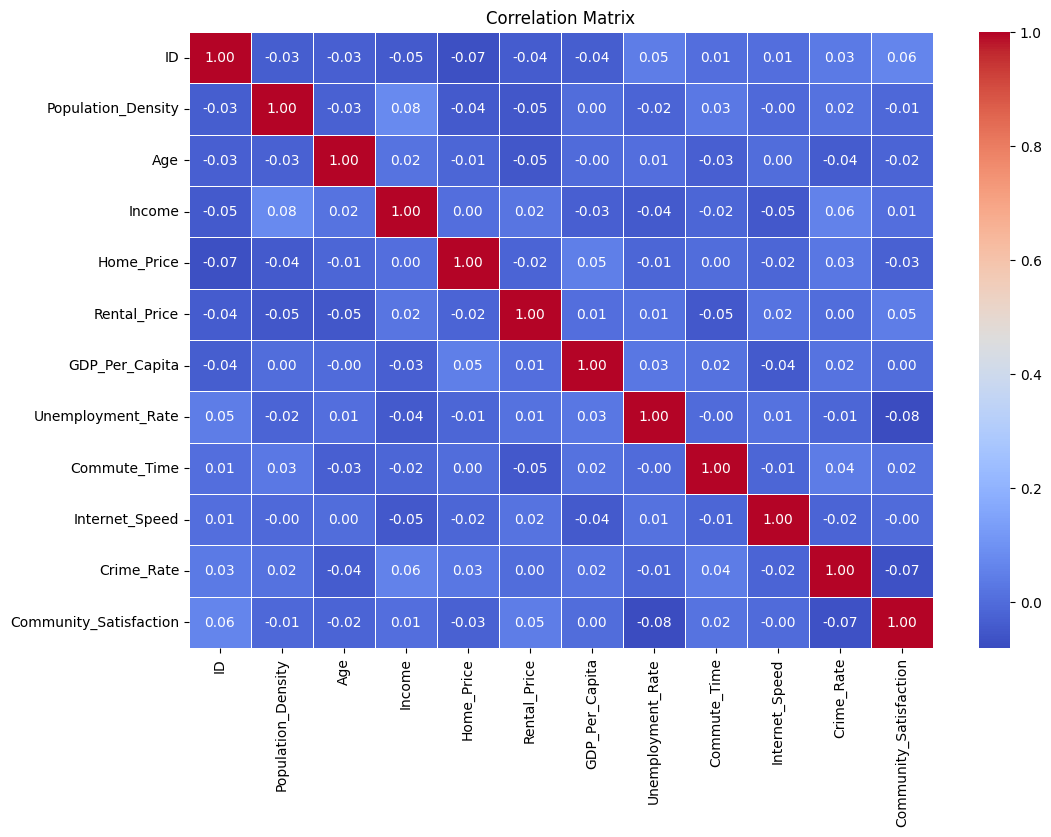

In [17]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

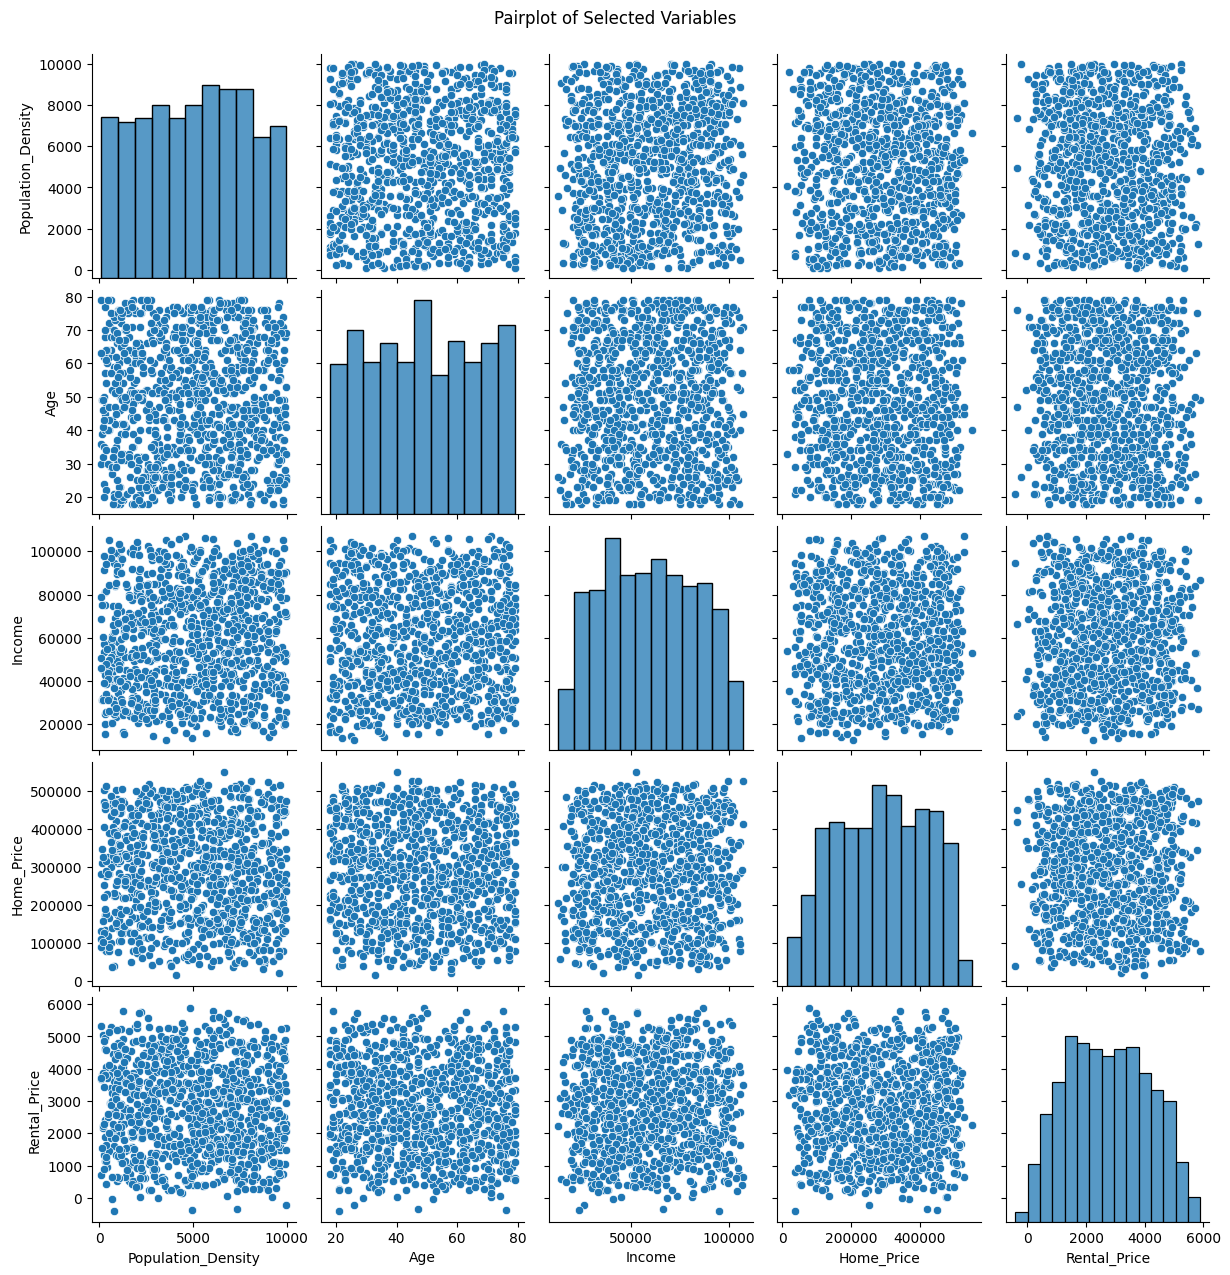

In [18]:
# Pairplot for selected variables
sns.pairplot(df[['Population_Density', 'Age', 'Income', 'Home_Price', 'Rental_Price']])
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

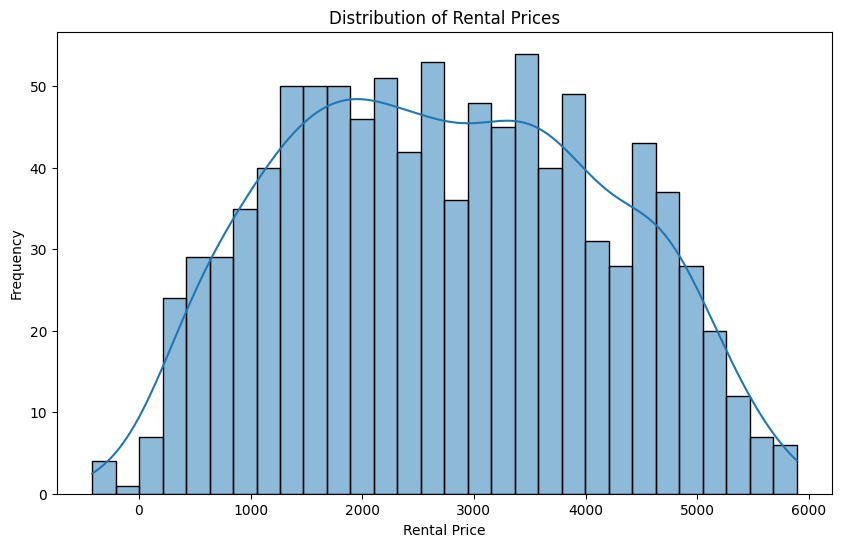

In [19]:
# Distribution of the target variable ('Rental_Price')
plt.figure(figsize=(10, 6))
sns.histplot(df['Rental_Price'], bins=30, kde=True)
plt.title("Distribution of Rental Prices")
plt.xlabel("Rental Price")
plt.ylabel("Frequency")
plt.show()

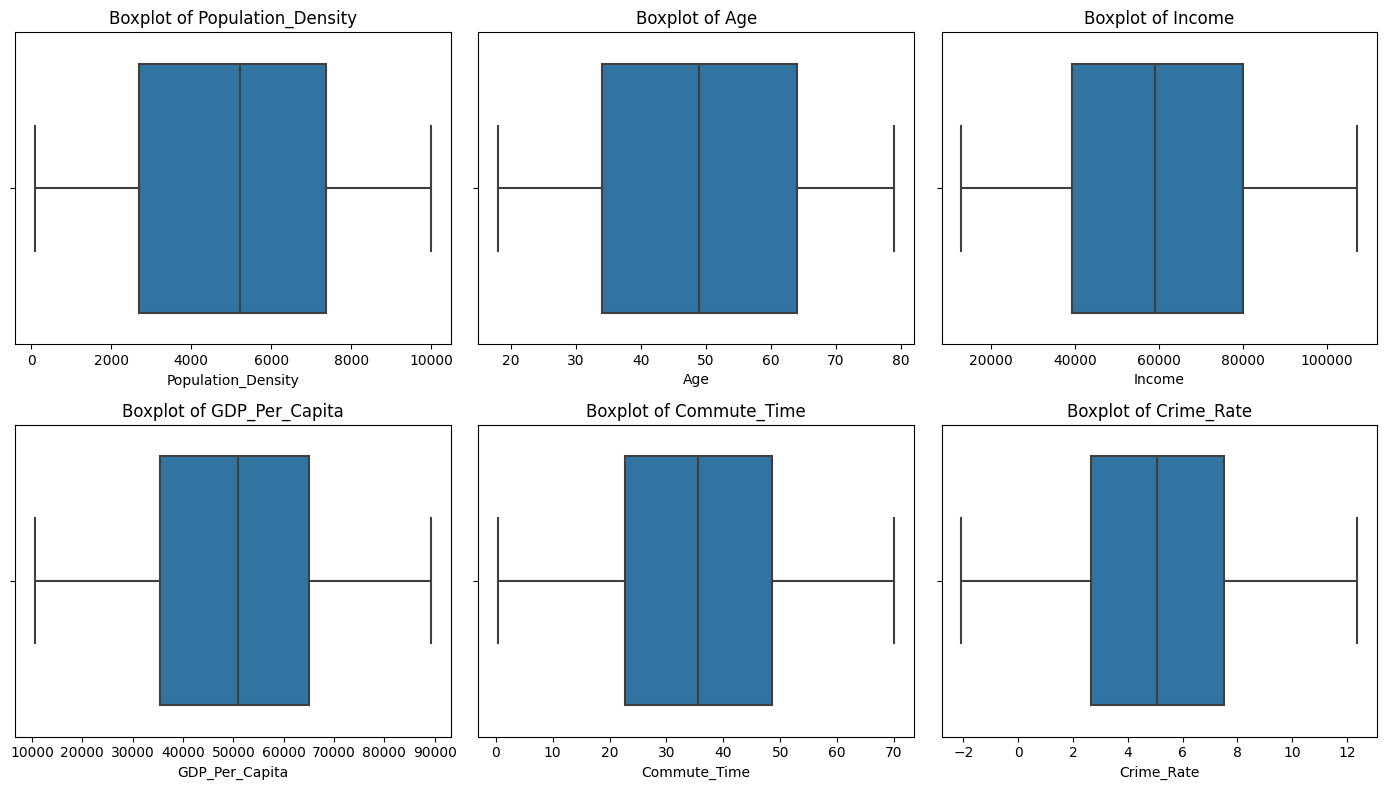

In [20]:
# Boxplots for selected variables
selected_vars = ['Population_Density', 'Age', 'Income', 'GDP_Per_Capita', 'Commute_Time', 'Crime_Rate']
plt.figure(figsize=(14, 8))
for i, var in enumerate(selected_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

In [21]:
# Select features (X) and target variable (y)
features = df.drop(['ID', 'Rental_Price'], axis=1)
target = df['Rental_Price']
features

,Population_Density,Age,Income,Home_Price,GDP_Per_Capita,Unemployment_Rate,Commute_Time,Internet_Speed,Crime_Rate,Community_Satisfaction
0,7370,59,59598.93026,50302.52947,50500.38795,5.117960,25.141150,30.190915,5.005252,14.455388
1,960,66,89393.81821,478055.12070,75697.67542,1.561291,36.092519,46.210121,3.031026,-1.441514
2,5490,45,44186.16587,516445.04470,34094.64615,12.149888,28.860140,6.354573,9.353770,0.987481
3,5291,48,58505.98158,151466.22800,47584.78960,11.208639,58.588483,46.007588,-0.488674,4.666650
4,5834,75,36284.92151,265844.58130,63108.66598,9.505303,30.351408,47.760305,9.377693,7.301778
...,...,...,...,...,...,...,...,...,...,...
995,7247,21,18022.55556,356190.90260,50707.00448,10.091833,40.638664,42.089032,6.110115,11.786552
996,4551,23,48242.83481,369652.01830,17574.52380,7.376045,16.342331,23.747782,10.192538,2.598525
997,3976,75,17201.19046,355466.98780,71820.72385,8.192591,41.406323,84.571292,8.395515,1.862371
998,6059,39,85212.45951,371770.29390,36282.89181,15.147105,8.367530,46.980726,3.648955,1.604906


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train

,Population_Density,Age,Income,Home_Price,GDP_Per_Capita,Unemployment_Rate,Commute_Time,Internet_Speed,Crime_Rate,Community_Satisfaction
914,9164,50,90277.87687,389717.23980,62755.12215,7.443513,30.852969,29.811048,3.157537,7.404685
930,7904,33,61364.18202,311537.64680,28758.53362,8.281570,45.063394,38.306913,4.913906,2.136466
979,2774,58,40560.51636,438106.34950,63622.47980,9.091853,39.414914,67.570454,9.069100,0.649687
770,623,64,55740.47960,300558.88530,41876.21857,4.584981,13.755983,60.323591,1.427547,3.043824
916,6513,55,24806.26839,262623.89450,48640.49895,10.913477,30.179903,43.158178,1.168056,0.398492
...,...,...,...,...,...,...,...,...,...,...
111,3940,35,46911.57227,223093.68520,61966.91947,12.834718,30.818322,28.864570,11.171697,4.605490
275,9246,40,44865.23432,477819.89680,77483.63658,10.525563,43.569773,52.337020,7.147097,6.628139
865,6416,24,76439.22103,267708.31440,35574.09803,5.474864,56.703272,79.087682,7.512854,5.064906
440,4711,52,67933.75795,53911.15979,37840.98572,8.117706,63.137641,100.560824,9.386115,3.800965


In [23]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 1.46293946,  0.06198817,  1.33029332, ..., -0.77341877,
        -0.62952719,  0.69500462],
       [ 1.01077843, -0.89339212,  0.10684536, ..., -0.47926698,
        -0.043892  , -0.77271876],
       [-0.83016288,  0.51157889, -0.77343654, ...,  0.53392277,
         1.34159584, -1.18693482],
       ...,
       [ 0.47679779, -1.39918168,  0.74472737, ...,  0.93268303,
         0.82268891,  0.04314319],
       [-0.13505502,  0.17438585,  0.38482901, ...,  1.67614628,
         1.44729981, -0.30899024],
       [ 1.13637872, -0.10660835, -0.57808324, ...,  0.92729307,
        -1.54486121,  0.11644274]])

In [24]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2142855.991146078
R-squared: -0.0781977029265879


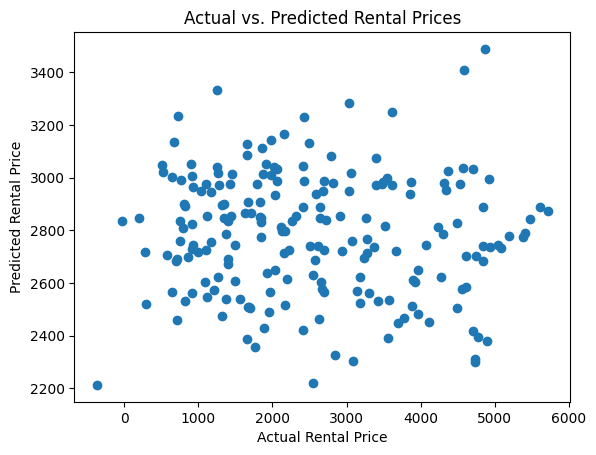

In [26]:
# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rental Price")
plt.ylabel("Predicted Rental Price")
plt.title("Actual vs. Predicted Rental Prices")
plt.show()
